# Simple Linear Regression

The goal of this project was to build a linear regression model from the ground up using numpy.

In [18]:
%matplotlib inline

#imports
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

#### Import the data
Here, we're using a dataset with two columns containing the amount of hours studied and the test scores students achieved, respectively.

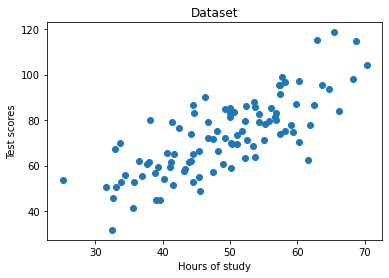

In [19]:
points = genfromtxt('data.csv', delimiter=',')

#Extract columns
x = array(points[:,0])
y = array(points[:,1])

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()

#### Defining the hyperparamters

In [20]:
#hyperparamters
learning_rate = 0.0001
initial_b = 0
initial_m = 0
num_iterations = 10

#### Define cost function

In [21]:
def compute_cost(b, m, points):
    total_cost = 0
    N = float(len(points))
    
    #Compute sum of squared errors
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (m * x + b)) ** 2
        
    #Return average of squared error
    return total_cost/N

#### Define Gradient Descent functions

In [22]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    cost_graph = []

    #For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, points))
        b, m = step_gradient(b, m, array(points), learning_rate)

    return [b, m, cost_graph]

def step_gradient(b_current, m_current, points, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))

    #Calculate Gradient
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))
    
    #Update current m and b
    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient

    #Return updated parameters
    return b_updated, m_updated

#### Run gradient_descent_runner() to get optimized parameters b and m

In [23]:
b, m, cost_graph = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, points))

Optimized b: 0.02963934787473239
Optimized m: 1.4774173755483797
Minimized cost: 112.65585181499746


#### Plotting the cost per iterations

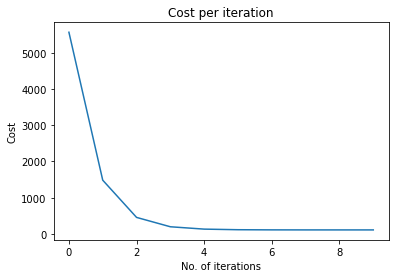

In [24]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

Gradient descent converges to local minimum after 5 iterations

#### Plot line of best fit

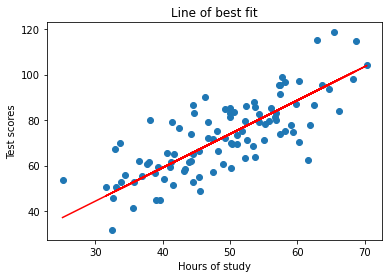

In [25]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = m * x + b
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()

You may modify this notebook to submit your answers to the following questions.

Question 1: Change the learning rate for 0.001, 0.005 and 0.00001 and plot cost_graph for each of these learning rates.

Question 2: Modify step_gradient function to implement stochastic gradient descent. Hint: This was explained during the class. Stochasticity in this context means there is a randomness in the order of the inputs i.e., before every iteration of gradient descent, shuffle the inputs. We also update the parameters for each individual input instead of updating them for the whole data at one shot. We do this to prevent over fitting and make the model more generalized. 

Question 3: Modify step_gradient function to implement mini-batch stochastic gradient descent. Hint: In stochastic gradient descent, all the parameters are updated for each input. This can lead to slow convergence. Hence, in each iteration, 1) we first shuffle the data, 2) we then create minibatches of the inputs and update the parameters based on the gradients computed for each of these batches.

Question 4: What are the benefits of gradient descent compared to normal equation w* = ((XX^T)^-1)*(XY).

Question 5: Explain the difference between PCA and Linear Regression using examples on a plot.

In [34]:
#hyperparamters

#All learning rates were tested and graph was observed

#learning_rate = 0.0001 // learning rate 1
#learning_rate = 0.0005 // learning rate 2
learning_rate = 0.00001 # learning rate 3 
initial_b = 0
initial_m = 0
num_iterations = 50

In [27]:
def compute_cost(b, m, points):
    total_cost = 0
    N = float(len(points))
    
    #Compute sum of squared errors
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (m * x + b)) ** 2
        
    #Return average of squared error
    return total_cost/N

In [28]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    cost_graph = []

    #For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, points))
        b, m = step_gradient(b, m, array(points), learning_rate)

    return [b, m, cost_graph]

def step_gradient(b_current, m_current, points, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))

    #Calculate Gradient
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))
    
    #Update current m and b
    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient

    #Return updated parameters
    return b_updated, m_updated

In [29]:
b, m, cost_graph = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, points))

Optimized b: 0.02711249515170944
Optimized m: 1.364147870044507
Minimized cost: 145.48545327834353


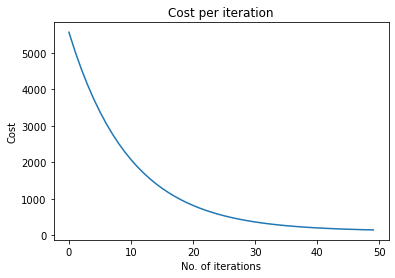

In [30]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

#QUESTION 1

Optimized b: 0.029511399417691712
Optimized m: 1.4678306594345913
Minimized cost: 112.9561532005955


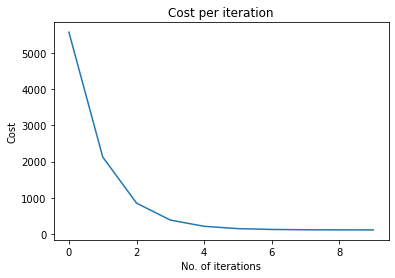

In [31]:
#Question 2: Modify step_gradient function to implement stochastic gradient descent. Hint: This was explained during the class. Stochasticity in this context means there is a randomness in the order of the inputs i.e., before every iteration of gradient descent, shuffle the inputs. We also update the parameters for each individual input instead of updating them for the whole data at one shot. We do this to prevent over fitting and make the model more generalized. 

#hyperparamters
learning_rate = 0.0001
initial_b = 0
initial_m = 0
num_iterations = 10

def compute_cost(b, m, points):
    total_cost = 0
    N = float(len(points))
    
    #Compute sum of squared errors
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (m * x + b)) ** 2
        
    #Return average of squared error
    return total_cost/N

def stochastic_gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    cost_graph = []

    #For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, points))
        random.shuffle(points)
        b, m = stochastic_step_gradient(b, m, array(points), learning_rate)

    return [b, m, cost_graph]

def stochastic_step_gradient(b_current, m_current, points, learning_rate):
    N = float(len(points))

    #Calculate Gradient
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient = - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient = - (2/N) * (y - (m_current * x + b_current))
    
        #Update current m and b
        m_current = m_current - learning_rate * m_gradient
        b_current = b_current - learning_rate * b_gradient

    #Return updated parameters
    return b_current, m_current

b, m, cost_graph = stochastic_gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, points))

plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

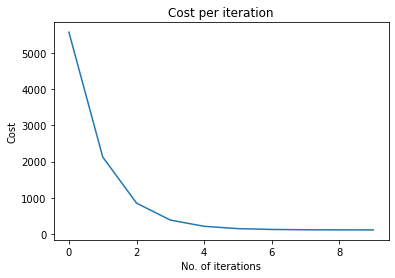

In [32]:
#Question 3: Modify step_gradient function to implement mini-batch stochastic gradient descent. Hint: In stochastic gradient descent, all the parameters are updated for each input. This can lead to slow convergence. Hence, in each iteration, 1) we first shuffle the data, 2) we then create minibatches of the inputs and update the parameters based on the gradients computed for each of these batches.

#hyperparamters
learning_rate = 0.0001
initial_b = 0
initial_m = 0
num_iterations = 10
batch_size = 10

def mini_batch_stochastic_step_gradient(b_current, m_current, points_batch, learning_rate):
    N = float(len(points_batch))

    # Initialize gradients
    b_gradient = 0
    m_gradient = 0
    
    # Calculate gradients for each point in the mini-batch
    for i in range(len(points_batch)):
        x = points_batch[i, 0]
        y = points_batch[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))
    
    # Update current m and b
    m_current = m_current - learning_rate * m_gradient
    b_current = b_current - learning_rate * b_gradient

    # Return updated parameters
    return b_current, m_current


plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

#Question 4: What are the benefits of gradient descent compared to normal equation w* = ((XX^T)^-1)*(XY).

The gradient descent algorithm is an iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, we ensure that the equation is proportional to the negative of the gradient (or approximate gradient) of the function at the current point. 

The normal equation is a closed-form solution to linear regression. It is expensive to compute large number of features. 

Gradient descent is a better option for large number of features. It is also more efficient when the number of features is large. 


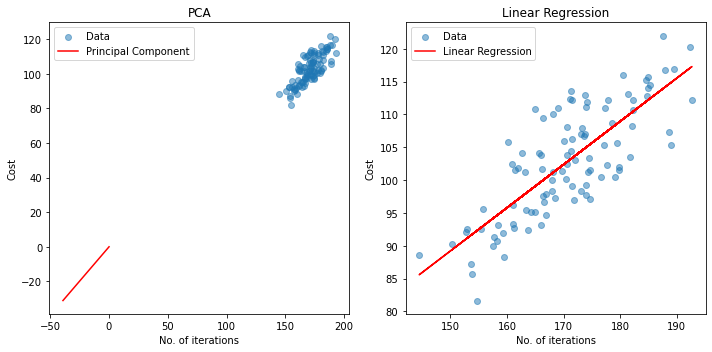

In [33]:
#Question 5: Explain the difference between PCA and Linear Regression using examples on a plot.

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Generate synthetic data for height and weight
np.random.seed(0)
num_samples = 100
height = np.random.normal(170, 10, num_samples)
weight = height * 0.6 + np.random.normal(0, 5, num_samples)

# Reshape the data for sklearn compatibility
data = np.vstack((height, weight)).T

# Perform PCA
pca = PCA(n_components=1)
principal_components = pca.fit_transform(data)

# Perform linear regression
lr = LinearRegression()
lr.fit(height.reshape(-1, 1), weight)
lr_weight_predicted = lr.predict(height.reshape(-1, 1))

# Plot the data and results
plt.figure(figsize=(10, 5))

# Plot PCA result
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label='Data')
plt.plot([0, pca.components_[0, 0]*50], [0, pca.components_[0, 1]*50], color='red', label='Principal Component')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('PCA')
plt.legend()

# Plot linear regression result
plt.subplot(1, 2, 2)
plt.scatter(height, weight, alpha=0.5, label='Data')
plt.plot(height, lr_weight_predicted, color='red', label='Linear Regression')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Linear Regression')
plt.legend()

plt.tight_layout()
plt.show()
